In [419]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [420]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [421]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [422]:
df.shape

(1470, 35)

In [423]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [424]:
#Applying label encoding to all the columns whereever required

In [425]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [426]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Department"]=LE.fit_transform(df["Department"])

In [427]:
df.Department.unique()

array([2, 1, 0])

In [428]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [429]:
df["BusinessTravel"]=LE.fit_transform(df["BusinessTravel"])

In [430]:
df.BusinessTravel.unique()

array([2, 1, 0])

In [431]:
df.DailyRate.unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [432]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [433]:
df["Attrition"]=LE.fit_transform(df["Attrition"])

In [434]:
df.Attrition.unique()

array([1, 0])

In [435]:
df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [436]:
df.columns
df.Over18.unique()
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [437]:
#OVER18 COLUMN CAN BE REMOVED AS IT HAS ONLY ONE UNIQUE VALUE

In [438]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [439]:
df.OverTime.unique()
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [440]:
df["OverTime"]=LE.fit_transform(df["OverTime"]) 

In [441]:
df.OverTime.unique()
df["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [442]:
df.EducationField.unique()
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [443]:
df["EducationField"]=LE.fit_transform(df["EducationField"]) 

In [444]:
df.EducationField.unique()
df["EducationField"].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [445]:
df.Gender.unique()
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [446]:
df["Gender"]=LE.fit_transform(df["Gender"]) 

In [447]:
df.Gender.unique()
df["Gender"].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [448]:
df.JobRole.unique()
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [449]:
df["JobRole"]=LE.fit_transform(df["JobRole"]) 

In [450]:
df.JobRole.unique()
df["JobRole"].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [451]:
df.MaritalStatus.unique()
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [452]:
df["MaritalStatus"]=LE.fit_transform(df["MaritalStatus"]) 

In [453]:
df.MaritalStatus.unique()
df["MaritalStatus"].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [532]:
#Applied label encoding on all the categorical column

In [454]:
df.describe

<bound method NDFrame.describe of       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                

In [455]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [456]:
# Data has been converted to int and no null values are there

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [458]:
#we are dropping the Over18 column as it has only one unique value

In [459]:
df.drop("Over18",axis=1,inplace=True)

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [461]:
# the dataset has only int and float values 

In [462]:
#Now applying PCA as there are so may columns and rows

<AxesSubplot:xlabel='Attrition', ylabel='count'>

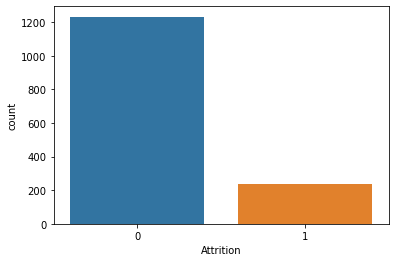

In [463]:
sns.countplot(df["Attrition"])

In [464]:
#This is a class imbalance problem

<AxesSubplot:>

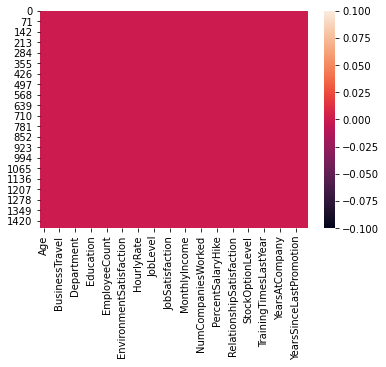

In [465]:
sns.heatmap(df.isnull())

In [466]:
#graph representing no null values present

In [467]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [468]:
#There is huge difference between mean and standard deviation for some columns

<AxesSubplot:>

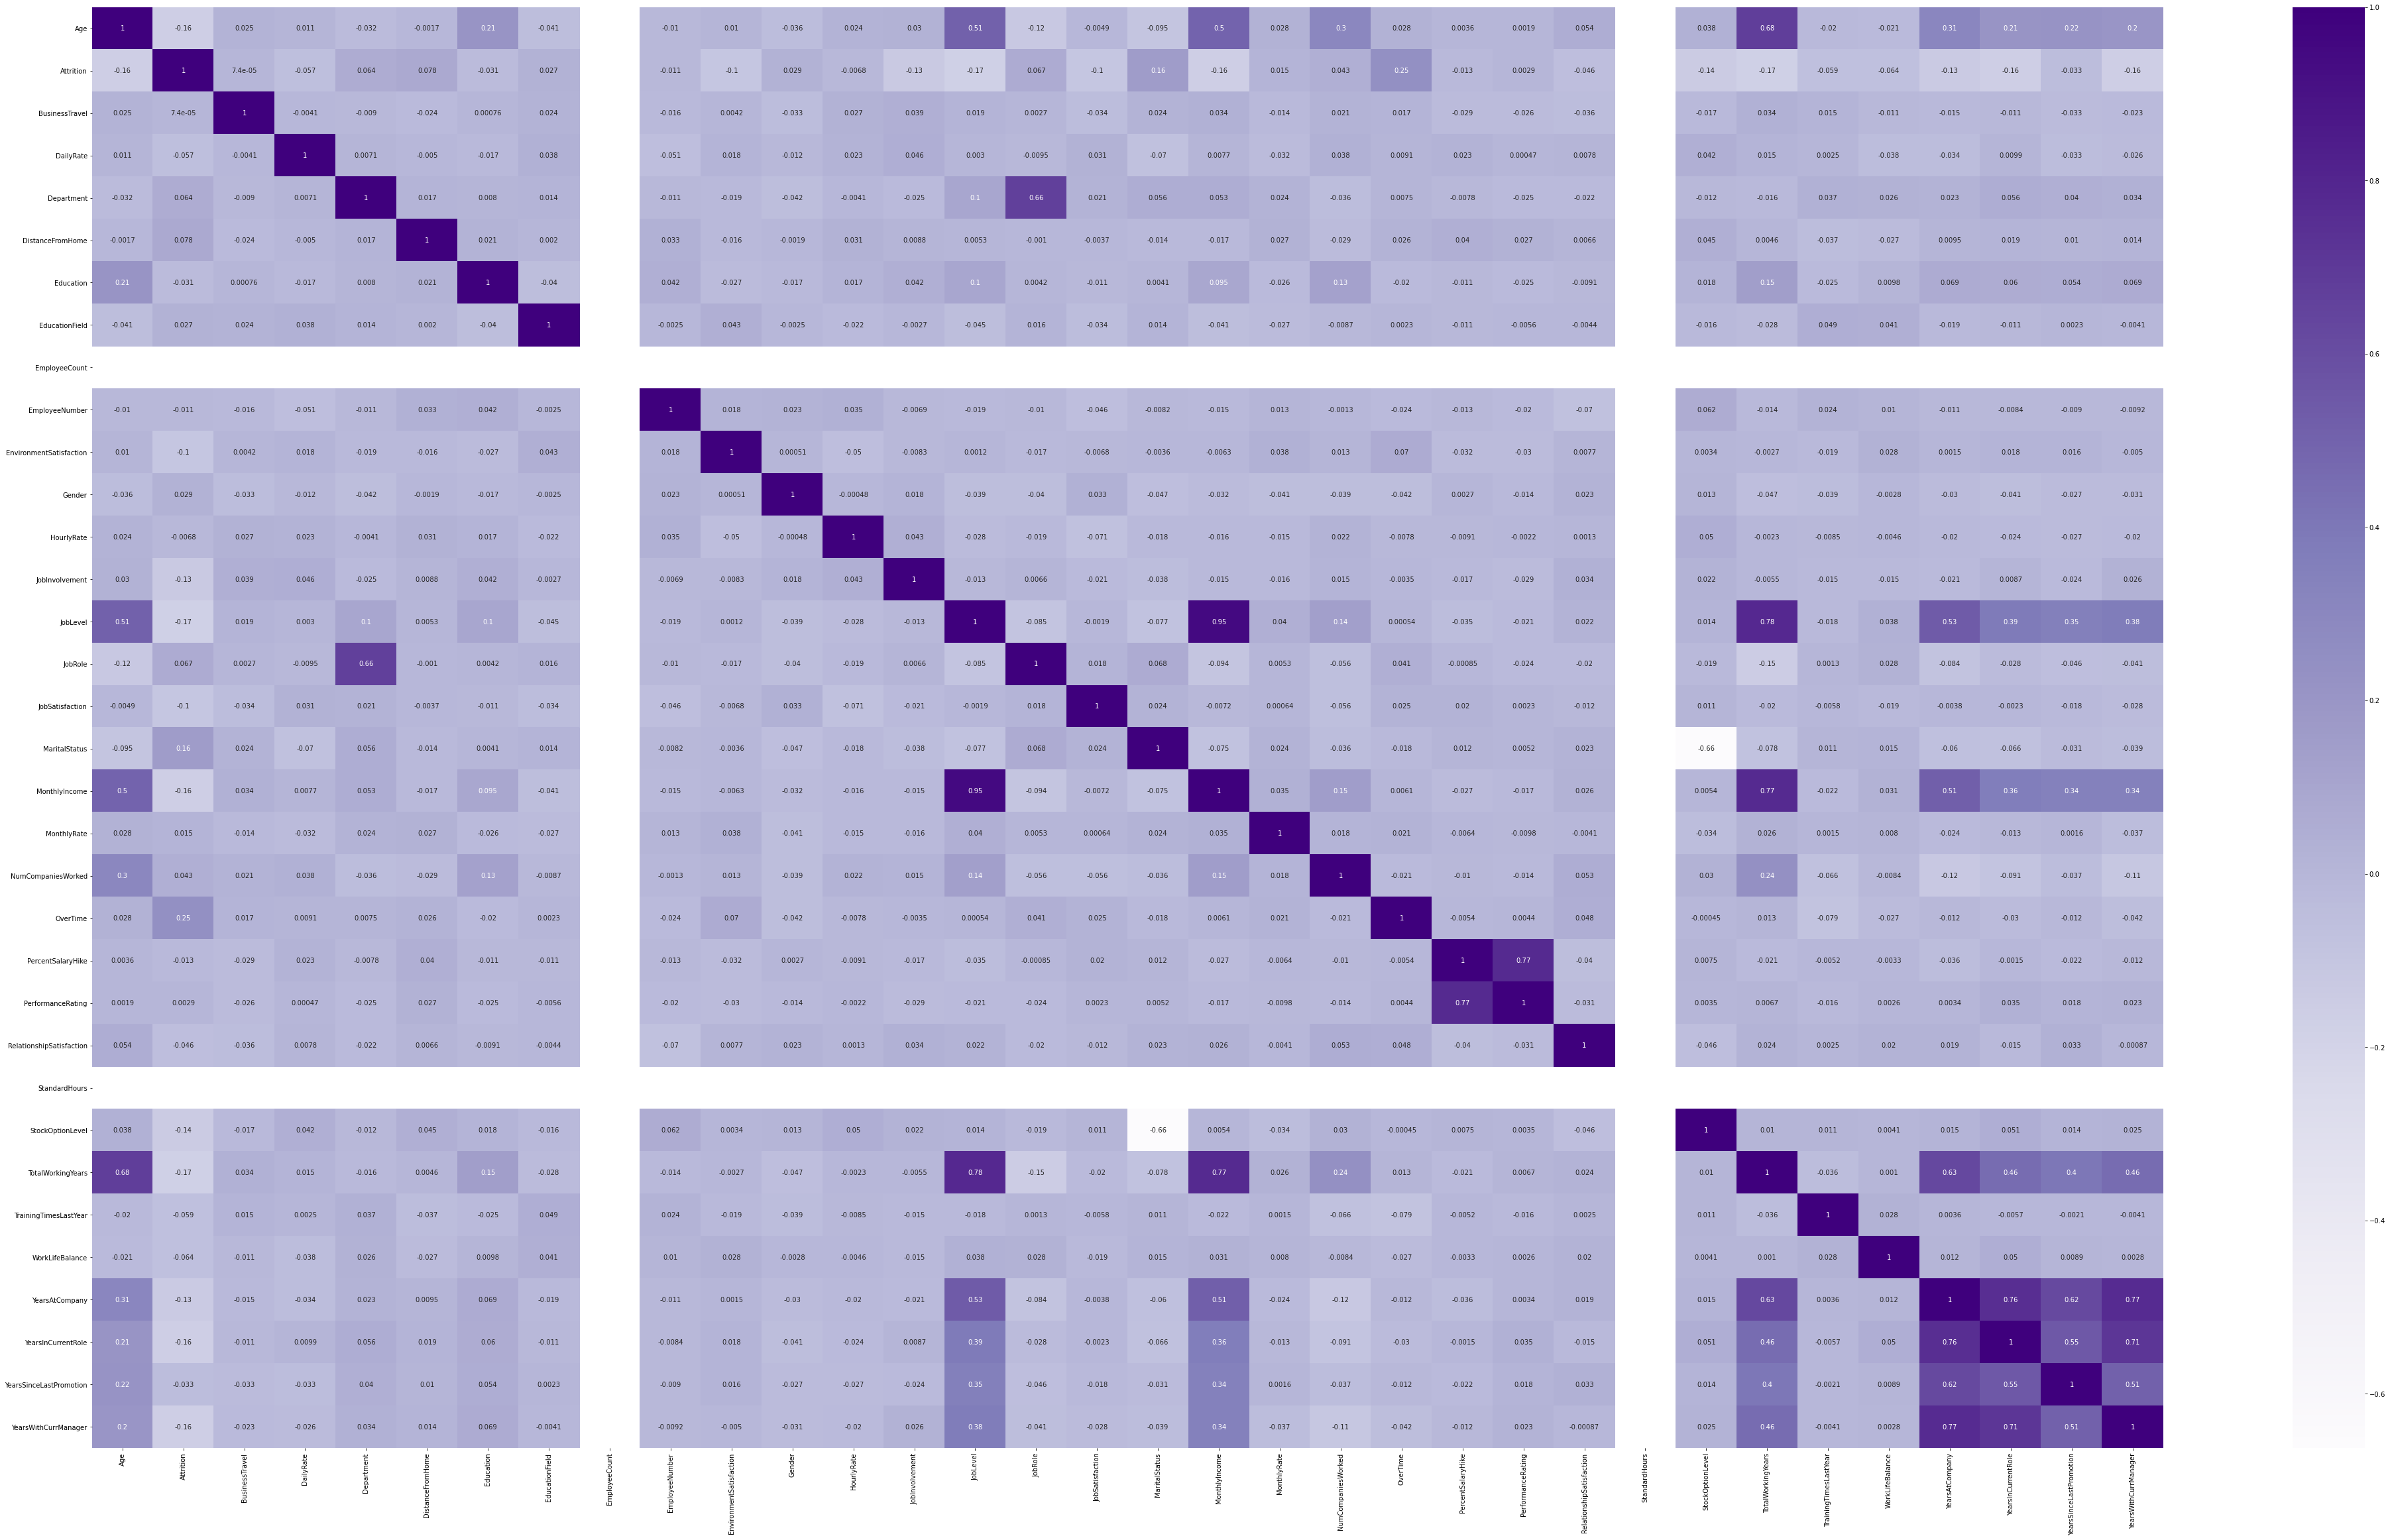

In [469]:
fig=plt.figure(figsize=(70,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

In [470]:
#Darker columns showing highly positive correlation and lighter columns showing highly negative correlatio 

In [471]:
#sns.pairplot(df)

<Figure size 432x288 with 0 Axes>

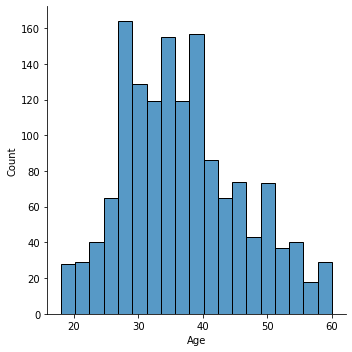

<Figure size 432x288 with 0 Axes>

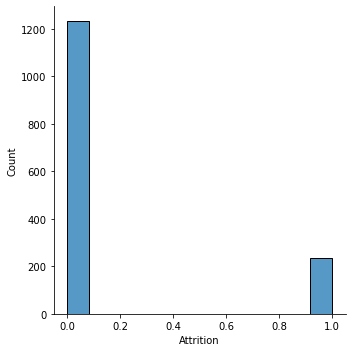

<Figure size 432x288 with 0 Axes>

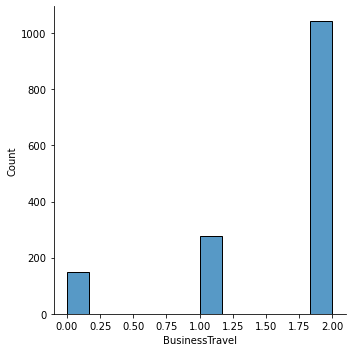

<Figure size 432x288 with 0 Axes>

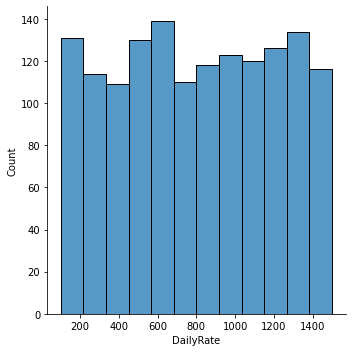

<Figure size 432x288 with 0 Axes>

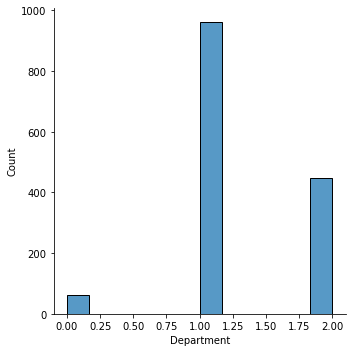

<Figure size 432x288 with 0 Axes>

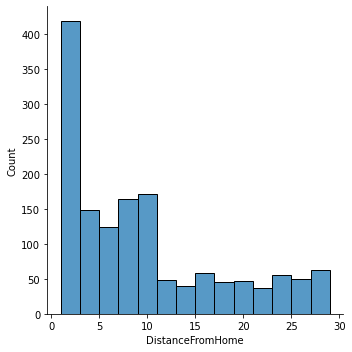

<Figure size 432x288 with 0 Axes>

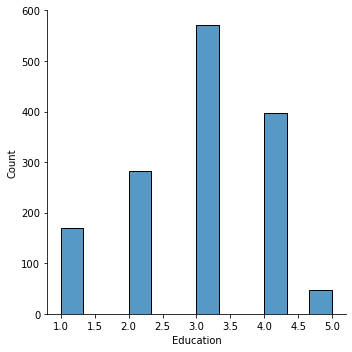

<Figure size 432x288 with 0 Axes>

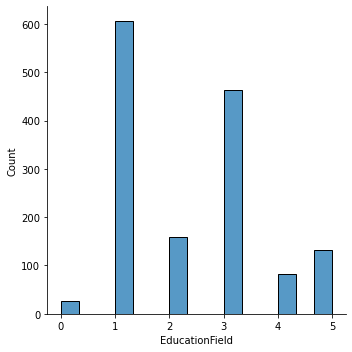

<Figure size 432x288 with 0 Axes>

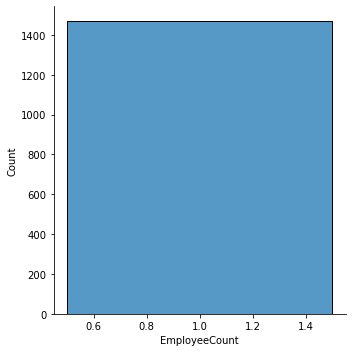

<Figure size 432x288 with 0 Axes>

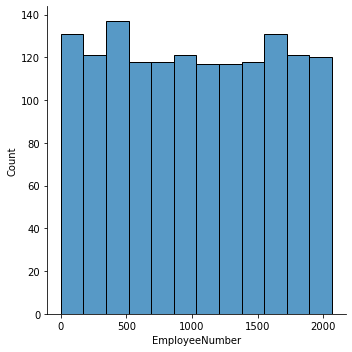

<Figure size 432x288 with 0 Axes>

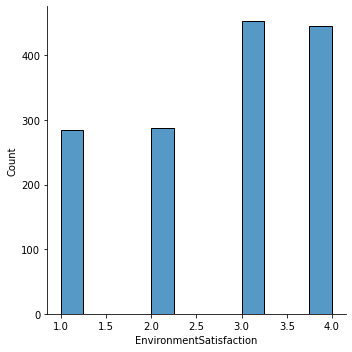

<Figure size 432x288 with 0 Axes>

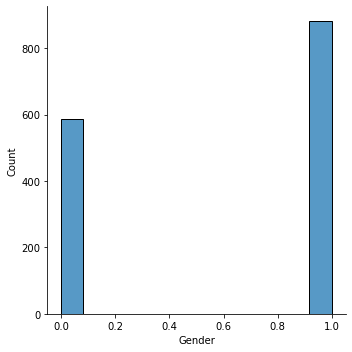

<Figure size 432x288 with 0 Axes>

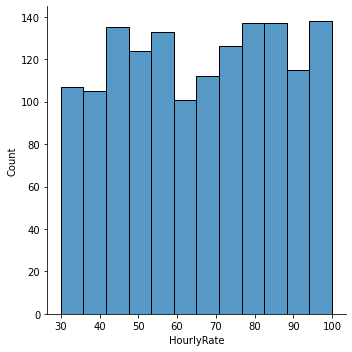

<Figure size 432x288 with 0 Axes>

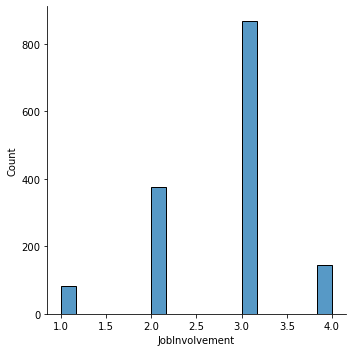

<Figure size 432x288 with 0 Axes>

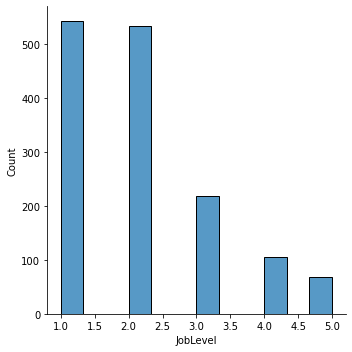

<Figure size 432x288 with 0 Axes>

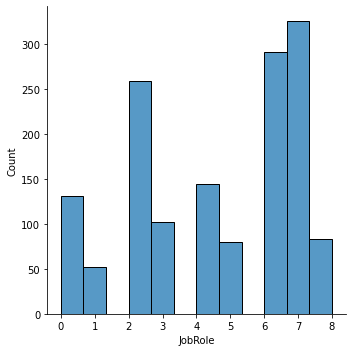

<Figure size 432x288 with 0 Axes>

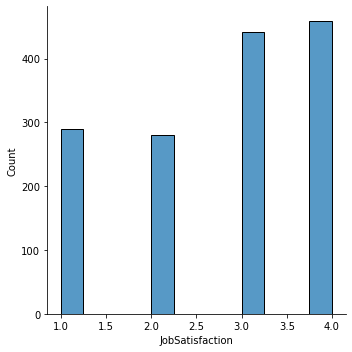

<Figure size 432x288 with 0 Axes>

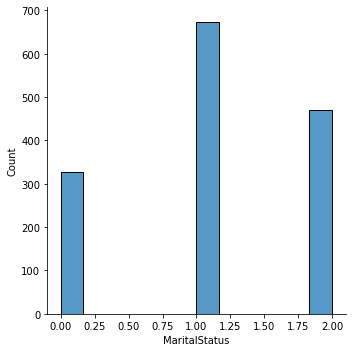

<Figure size 432x288 with 0 Axes>

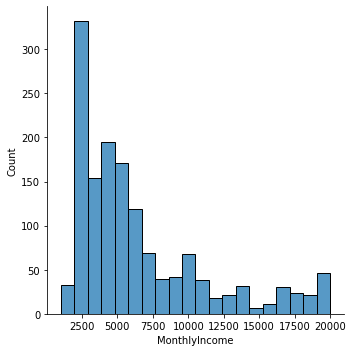

<Figure size 432x288 with 0 Axes>

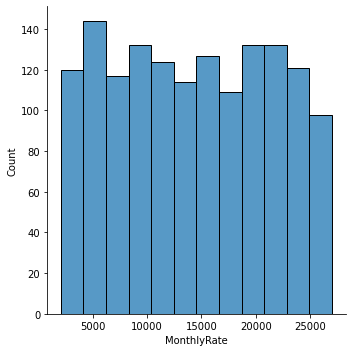

<Figure size 432x288 with 0 Axes>

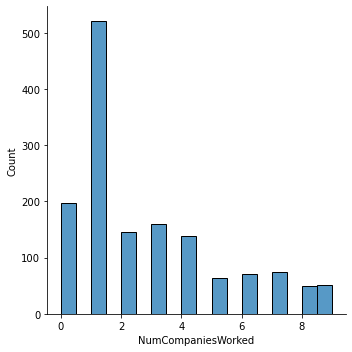

<Figure size 432x288 with 0 Axes>

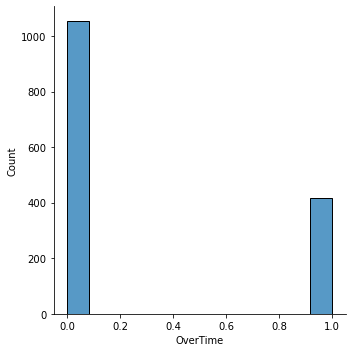

<Figure size 432x288 with 0 Axes>

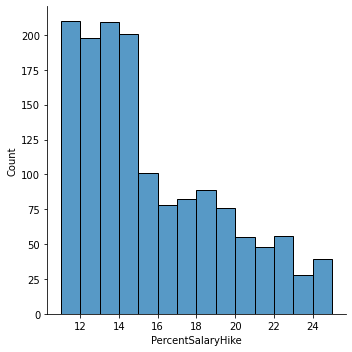

<Figure size 432x288 with 0 Axes>

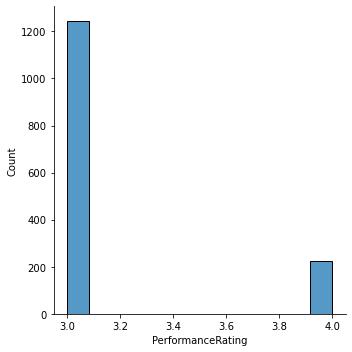

<Figure size 432x288 with 0 Axes>

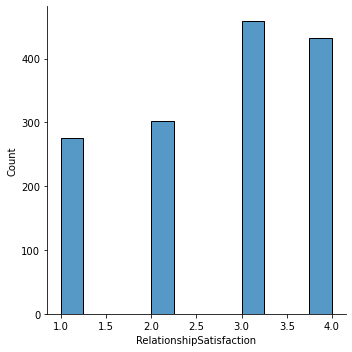

<Figure size 432x288 with 0 Axes>

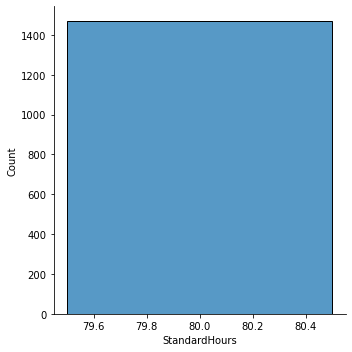

<Figure size 432x288 with 0 Axes>

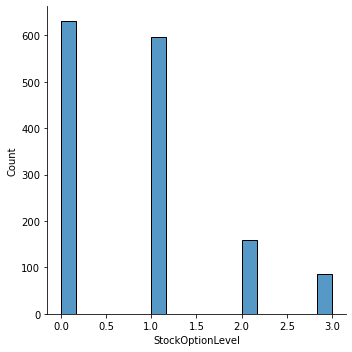

<Figure size 432x288 with 0 Axes>

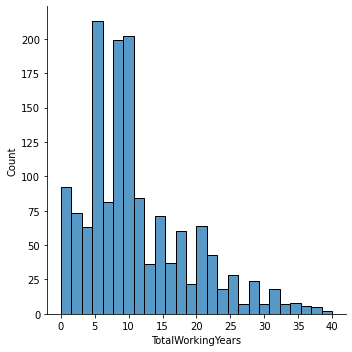

<Figure size 432x288 with 0 Axes>

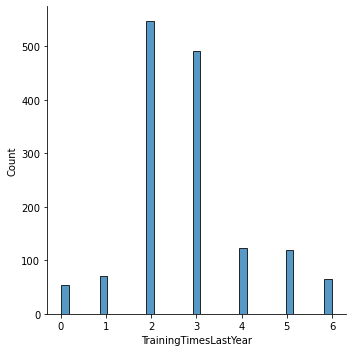

<Figure size 432x288 with 0 Axes>

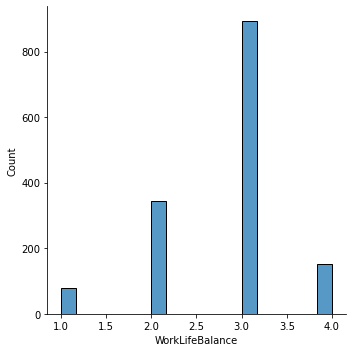

<Figure size 432x288 with 0 Axes>

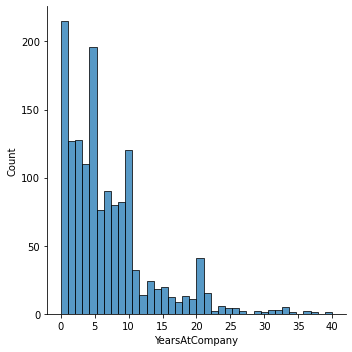

<Figure size 432x288 with 0 Axes>

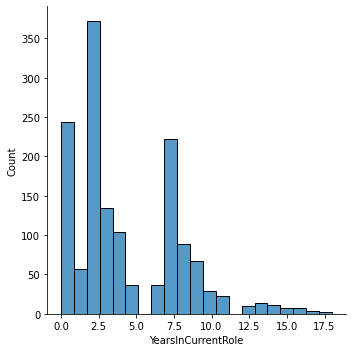

<Figure size 432x288 with 0 Axes>

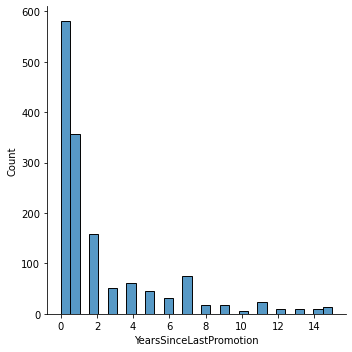

<Figure size 432x288 with 0 Axes>

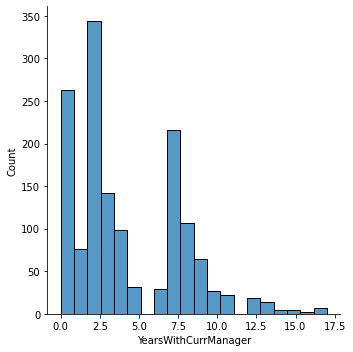

In [472]:
columns=df.columns

for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

In [473]:
#plotted ech graph individually and found that there are outliers present in many columns

In [474]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

In [475]:
#Trying to remove outliers

In [476]:
#from scipy.stats import zscore
#z=np.abs(zscore(df))
#df_new=df[(z<3).all(axis=1)]

In [477]:
#print("shape before and after")
#print("shape before".ljust(20),":",df.shape)
#print("shape after".ljust(20),":",df_new.shape)
#print("percentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

In [478]:
#zscore didnot worked for removing outliers

<AxesSubplot:xlabel='Attrition', ylabel='Density'>

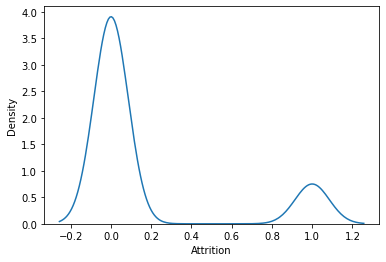

In [479]:
sns.kdeplot(df["Attrition"])

In [480]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [481]:
#from sklearn.preprocessing import power_transform
#df_new=power_transform(x)

#df_new=pd.DataFrame(df_new,columns=x.columns)

In [482]:
#df_new.skew()

In [483]:
#df.shape

In [484]:
#df_new.shape

In [485]:
#applied power transformation

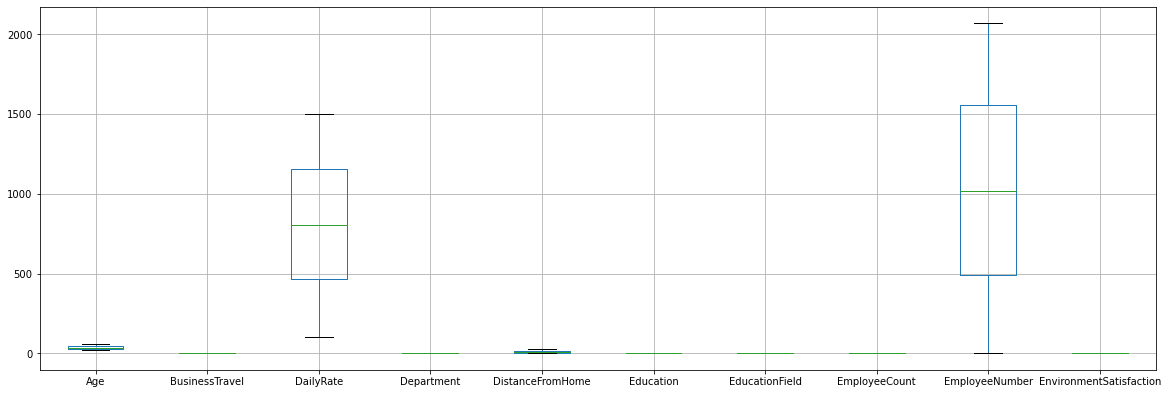

In [486]:
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

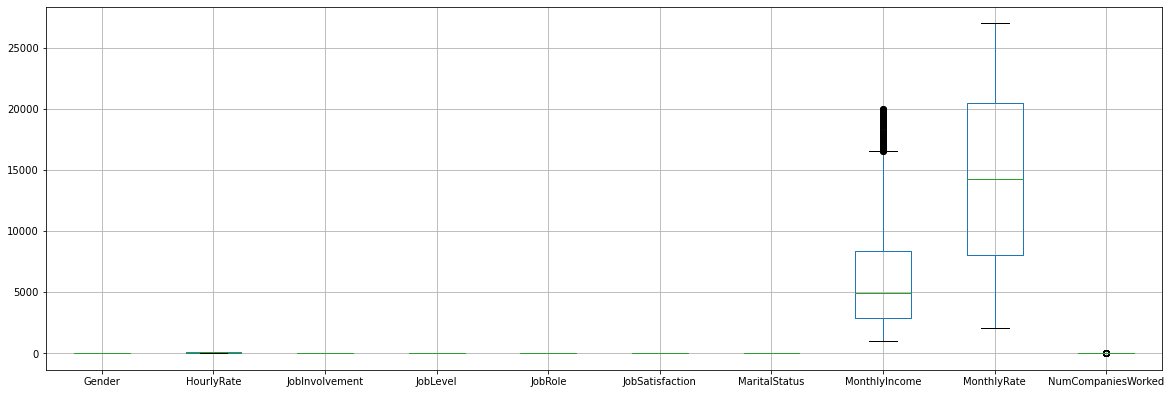

In [487]:
x.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

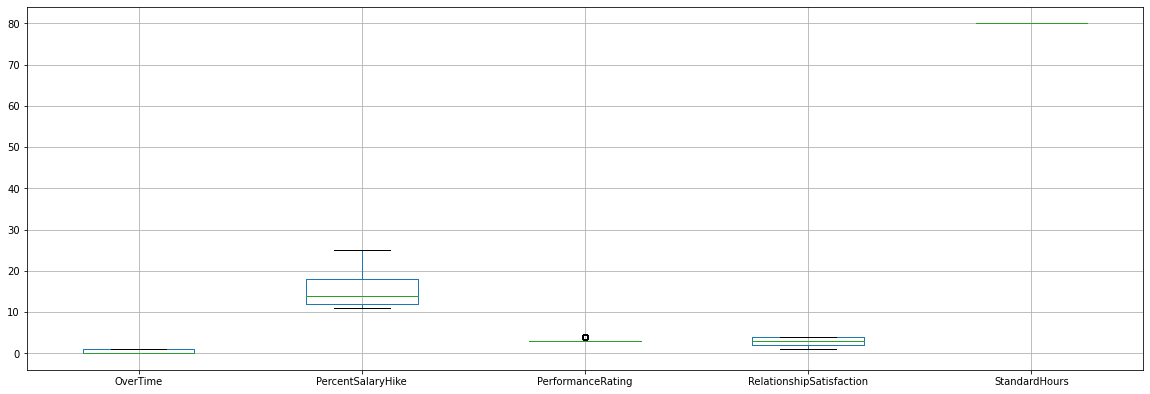

In [488]:
x.iloc[:,20:25].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

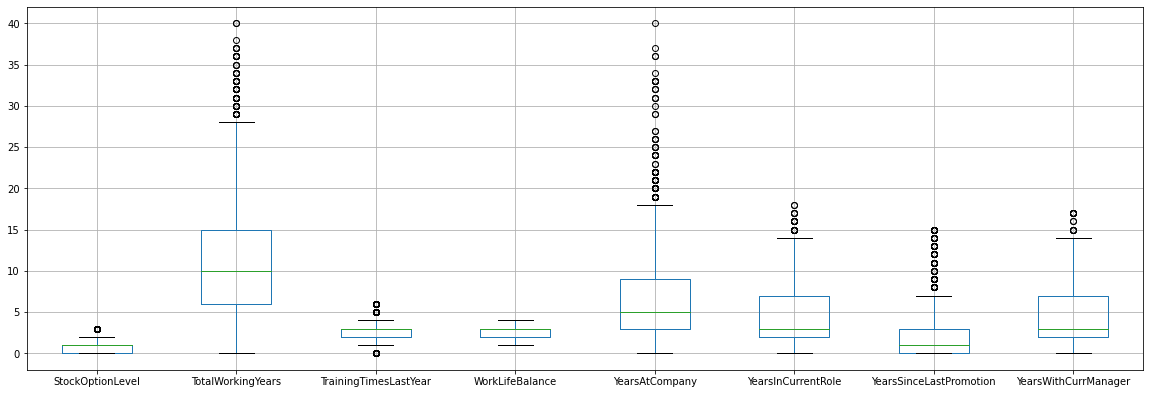

In [489]:
x.iloc[:,25:34].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [490]:
#NOT REMOVING THE OUTLIERS AS THROUGH THE ZSCORE AND ALSO THROUGH POWER TRANSFORMATION IT FAILED TO REMOVE 

In [491]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

X=pd.DataFrame(x,columns=x.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [492]:
#Scalled the data

In [493]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(X,y)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

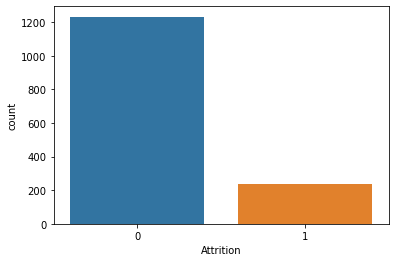

In [494]:
sns.countplot(df["Attrition"])

In [495]:
y_over.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [496]:
#the class is balanced now

In [497]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu," on Random sate ",maxRS)

best accuracy is  0.7351351351351352  on Random sate  119


In [498]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=162)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1726, 33)
(740, 33)
(1726,)
(740,)


In [499]:
#the training and testng data has been splited

In [500]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.677027027027027
[[246 143]
 [ 96 255]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       389
           1       0.64      0.73      0.68       351

    accuracy                           0.68       740
   macro avg       0.68      0.68      0.68       740
weighted avg       0.68      0.68      0.68       740



In [501]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.7405405405405405
[[258 131]
 [ 61 290]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       389
           1       0.69      0.83      0.75       351

    accuracy                           0.74       740
   macro avg       0.75      0.74      0.74       740
weighted avg       0.75      0.74      0.74       740



In [502]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.5945945945945946
[[178 211]
 [ 89 262]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.54       389
           1       0.55      0.75      0.64       351

    accuracy                           0.59       740
   macro avg       0.61      0.60      0.59       740
weighted avg       0.61      0.59      0.59       740



In [503]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.9027027027027027
[[361  28]
 [ 44 307]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       389
           1       0.92      0.87      0.90       351

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



In [504]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred4=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8648648648648649
[[327  62]
 [ 38 313]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       389
           1       0.83      0.89      0.86       351

    accuracy                           0.86       740
   macro avg       0.87      0.87      0.86       740
weighted avg       0.87      0.86      0.86       740



In [505]:
#Aplied all the model and found that best accuracy is provided by RandomForestClassifier model

In [506]:
#Cross Validation

In [507]:
score=cross_val_score(lg,X,y,cv=5)
print(score)
print(score.mean())

[0.84013605 0.83673469 0.84693878 0.84013605 0.84013605]
0.8408163265306123


In [508]:
score=cross_val_score(gnb,X,y,cv=5)
print(score)
print(score.mean())

[0.84013605 0.78231293 0.7585034  0.78231293 0.82312925]
0.7972789115646259


In [509]:
score=cross_val_score(sv,X,y,cv=5)
print(score)
print(score.mean())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817


In [510]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[0.85714286 0.86054422 0.86394558 0.85034014 0.85714286]
0.8578231292517005


In [511]:
score=cross_val_score(ad,X,y,cv=5)
print(score)
print(score.mean())

[0.83673469 0.87755102 0.83673469 0.86734694 0.84013605]
0.8517006802721088


In [512]:
#LR	0.720	0.84	0.12
#GNB	0.75322	0.79	0.03678
#SVC	0.5653	0.83	0.2647
#RF	0.93186	0.85	-0.08186
#AD	0.8545	0.85	-0.0045


In [513]:
#FINDED OUT THE DIFFERENCE AND FOUND THAT ADA BOOST MODEL HAS LEAST DIFFERENCE.

In [514]:
#HYPER PARAMETER TUUNING THROUGH GRID SEARCHCV

In [524]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X,y = make_classification(n_samples=100000)

params = {'base_estimator__max_depth':[1,50],
          'base_estimator':[DecisionTreeClassifier(max_features=2), 
                            DecisionTreeClassifier(max_features=10)]}
gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params)
gs.fit(X,y)
print(gs.best_estimator_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=10))


In [530]:
Final_mod=AdaBoostClassifier(n_estimators=100, random_state=0)
                             
Final_mod.fit(x_train, y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.48648648648648


In [531]:
import joblib
joblib.dump(Final_mod,"FinalModel.obj")
print("object of the dataset has been created")

object of the dataset has been created
